### SVM regression - example 1 - Work experience vs. yearly salary, AUTOMATIC SCALING


### USE THIS TEMPLATE FOR YOUR EXERCISE PROJECT

In [11]:
# usual imports in a classic ML pipeline for Regression
# pip install numpy
# pip install pandas
# pip install seaborn
# pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import TransformedTargetRegressor

### STEP 1 - Load the data

In [12]:
# load the data
csv_path = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Salary_Data.csv"
df = pd.read_csv(csv_path)

# let's quickly see the first 5 rows of data
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**STEP 2: Basic data checks, duplicates or missing values (NaN)?**

In [13]:
# do we have missing values? apparently not
# dataset can't have any missing values when passing the data
# to the machine learning algorithm
df.isna().sum()


YearsExperience    0
Salary             0
dtype: int64

In [14]:
# do we have duplicates?
int(df.duplicated().sum())

0

**All data is now prepared and in numeric format (this data didn't have any categories)**

### STEP 3: X/y and train/test -split

In [15]:
# first step, we split our data into SUPPORT variables and the TARGET variable
# X => support variables, y => target variable

# X => list of support variables the model uses 
# while predicting the target variable with the model
X = df[['YearsExperience']]

# our target variable is y
y = df['Salary']

In [16]:
# secondly, train/test -split with scikit-learn's helper function
# 0.3 for testing => 30% of data is reserved for testing purposes
# and based on that => it's deduced that 70% will be in the training data

# you can also define the random state, which is sometimes useful
# if you want to "lock down" all the randomness in order to get same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### STEP 4: Create and train the ML model

In [17]:
# create the model and train it with the data
# use pipeline to scale the X-values automatically with StandardScaler
pipeline = make_pipeline(StandardScaler(), svm.LinearSVR())

model = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=MinMaxScaler()
)

model.fit(X_train, y_train)

,"regressor regressor: object, default=NoneRegressor object such as derived from:class:`~sklearn.base.RegressorMixin`. This regressor willautomatically be cloned each time prior to fitting. If `regressor isNone`, :class:`~sklearn.linear_model.LinearRegression` is created and used.",Pipeline(step...LinearSVR())])
,"transformer transformer: object, default=NoneEstimator object such as derived from:class:`~sklearn.base.TransformerMixin`. Cannot be set at the same timeas `func` and `inverse_func`. If `transformer is None` as well as`func` and `inverse_func`, the transformer will be an identitytransformer. Note that the transformer will be cloned during fitting.Also, the transformer is restricting `y` to be a numpy array.",MinMaxScaler()
,"func func: function, default=NoneFunction to apply to `y` before passing to :meth:`fit`. Cannot be setat the same time as `transformer`. If `func is None`, the function used will bethe identity function. If `func` is set, `inverse_func` also needs to beprovided. The function needs to return a 2-dimensional array.",None
,"inverse_func inverse_func: function, default=NoneFunction to apply to the prediction of the regressor. Cannot be set atthe same time as `transformer`. The inverse function is used to returnpredictions to the same space of the original training labels. If`inverse_func` is set, `func` also needs to be provided. The inversefunction needs to return a 2-dimensional array.",None
,"check_inverse check_inverse: bool, default=TrueWhether to check that `transform` followed by `inverse_transform`or `func` followed by `inverse_func` leads to the original targets.",True
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"epsilon epsilon: float, default=0.0Epsilon parameter in the epsilon-insensitive loss function. Notethat the value of this parameter depends on the scale of the targetvariable y. If unsure, set ``epsilon=0``.",0.0
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.",1.0


### STEP 5: Error and performance metrics

In [18]:
# we need to create test predictions based on our earlier reserved test dataset
# this data has never been seen by the model by now

# THESE PREDICTIONS ARE IN SCALED FORMAT
predictions = model.predict(X_test)

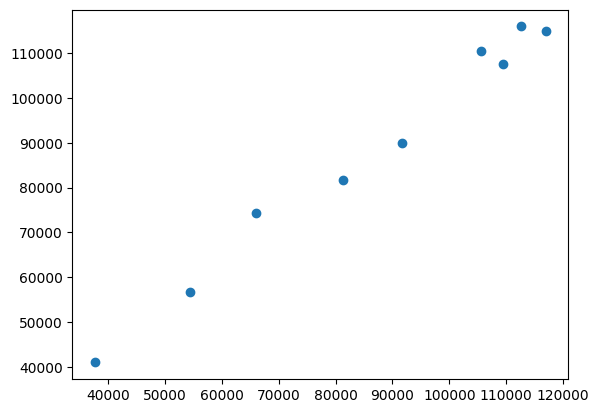

In [19]:
# let's plot how far the predictions are from the real target values (y)
# in the test dataset

# if the values follow a diagonal line (from bottom left to top right)
# => we have good predictions with the model
# we basically compare the predicted values to the actual true values 
# and compare the differences
plt.scatter(y_test, predictions)
plt.show()

In [20]:
# MAE = Mean average error
mae = metrics.mean_absolute_error(y_test, predictions)
print("MAE:")
print(f"{round(mae, 2)} $")

# MSE = Mean squared error
mse = metrics.mean_squared_error(y_test, predictions)
print("\nMSE:")
print(f"{round(mse, 2)} $^2")

# RMSE = Root Mean Squared Error
rmse = np.sqrt(mse)
print("\nRMSE:")
print(f"{round(rmse, 2)} $")

# R-square (or R2) - how well the model describes the original dataset
# 1 => model describes the data perfectly
# 0 => model doesn't describe the data at all
r2 = metrics.r2_score(y_test, predictions)
print("\nR-squared:")
print(f"{round(r2, 2)}")

# # SCALED VERSIONS OF THE METRICS, only use MAE and RMSE
# y_test_scaled = model.transformer_.transform(y_test.values.reshape(-1, 1)).ravel()
# predictions_scaled = model.transformer_.transform(predictions.shape(-1, 1)).ravel()

# mae_scaled = metrics.mean_absolute_error(y_test_scaled, predictions_scaled)
# rmse_scaled = np.sqrt(metrics.mean_squared_error(y_test_scaled, predictions_scaled))

# print(f"\nMAE scaled: {mae_scaled}")
# print(f"\nRMSE scaled: {rmse_scaled}")

MAE:
3090.79 $

MSE:
14311966.23 $^2

RMSE:
3783.12 $

R-squared:
0.98


C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_3116\2920752686.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


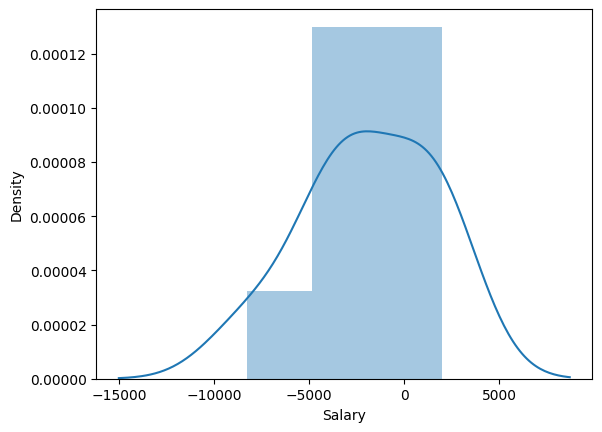

In [21]:
# if the prediction distribution is far from standard normal distritbuion
# then the model is not probably good enough
# distplot is deprecated and will be removed in future seaborn versions
# but not direct replacement has been created so far
sns.distplot((y_test - predictions))
plt.show()
plt.close()

### STEP 6: Testing/using the model in practice (inference)

In [22]:
# usually in GUI application we save the model-object / variable into a file (by using joblib-module)
# and in the GUI application => we load the saved model from the file
# and use the model just like here below

# this variable could be connected to a user interface (textbox, slider etc.)
test_experience = 9

# map all the variables from the user
# into a Python dictionary
# the variable names have to match with the original dataset
tester_row = {
    "YearsExperience": test_experience
}

# convert to pandas format
tester_row = pd.DataFrame([tester_row])

In [23]:
# get the output/result from the model
# based on the user's given new data (above code cell)
result = model.predict(tester_row)[0]

print()
print(f"Predicted salary with {test_experience} years of work experience:")
print(f"$ {round(float(result), 2)}")
print("----------------------------")


Predicted salary with 9 years of work experience:
$ 110371.54
----------------------------
